In [765]:
import numpy as np
import pandas as pd

In [766]:
df = pd.read_csv('spam.csv')

In [767]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4872,ham,Lol! Oops sorry! Have fun.,NaN,NaN,NaN
5352,ham,Good morning princess! Have a great day!,NaN,NaN,NaN
5549,ham,"You know, wot people wear. T shirts, jumpers, ...",NaN,NaN,NaN
2812,ham,Enjoy the showers of possessiveness poured on ...,NaN,NaN,NaN
3306,ham,Set a place for me in your heart and not in yo...,NaN,NaN,NaN


In [768]:
df.shape

(5572, 5)

In [769]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [771]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [772]:
df.sample(5)

,v1,v2
1007,ham,I don't quite know what to do. I still can't g...
1139,ham,Message:some text missing* Sender:Name Missing...
4853,ham,"Also north carolina and texas atm, you would j..."
424,ham,Send this to ur friends and receive something ...
455,ham,Si si. I think ill go make those oreo truffles.


In [773]:
# renaming the cols
df.rename(columns={'v1':'Label','v2':'Message'},inplace=True)
df.sample(5)

,Label,Message
149,ham,Sindu got job in birla soft ..
1347,ham,She doesnt need any test.
237,ham,Where are you?when wil you reach here?
2407,ham,Solve d Case : A Man Was Found Murdered On &l...
1869,ham,Mom wants to know where you at


In [774]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [775]:
df['Label'] = encoder.fit_transform(df['Label'])

In [776]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [777]:
# missing values
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [778]:
# check for duplicate values
df.duplicated().sum()

403

In [779]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [780]:
df.duplicated().sum()

0

In [781]:
df.shape

(5169, 2)

## 2.EDA

In [782]:
df.head()

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [783]:
df['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

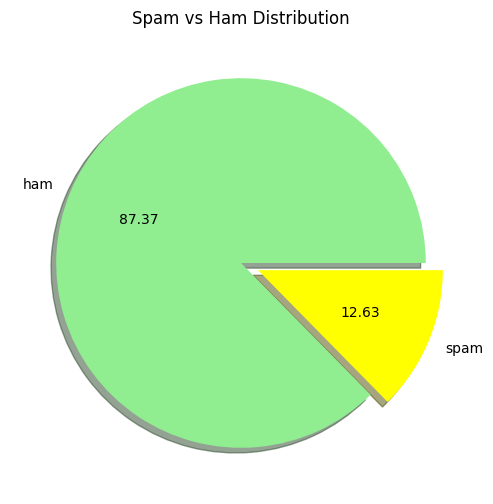

In [784]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(df['Label'].value_counts(), labels=['ham','spam'],autopct="%0.2f",colors=['lightgreen', 'yellow'], explode=[0, 0.1], shadow=True)
plt.title('Spam vs Ham Distribution')
plt.show()

In [785]:
# Data is imbalanced

In [786]:
import nltk

In [787]:
!pip install nltk

In [788]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [789]:
df['num_characters'] = df['Message'].apply(len)

In [790]:
df.head()

,Label,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [791]:
# num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [792]:
df.head()

,Label,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [793]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [794]:
df.head()

,Label,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [795]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [796]:
# ham
df[df['Label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [797]:
#spam
df[df['Label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [798]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

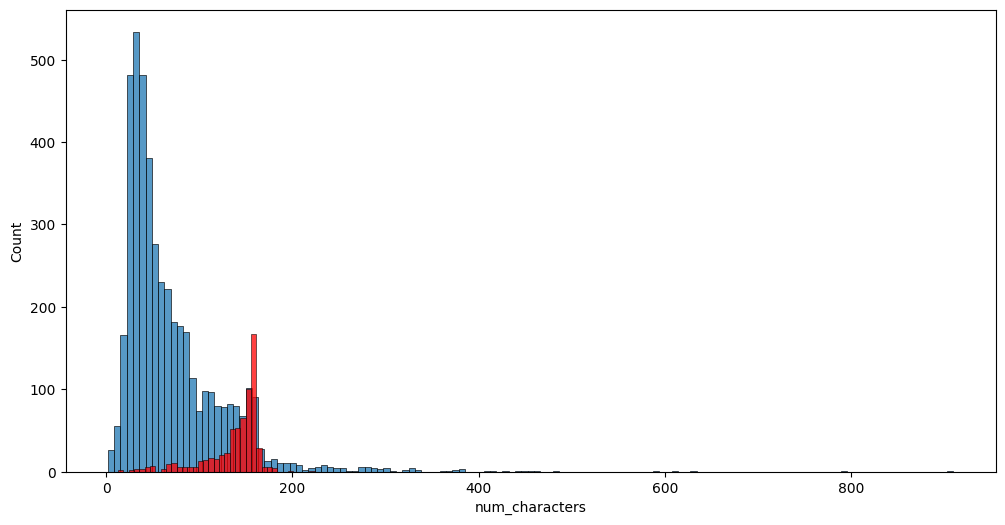

In [799]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['num_characters'])
sns.histplot(df[df['Label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

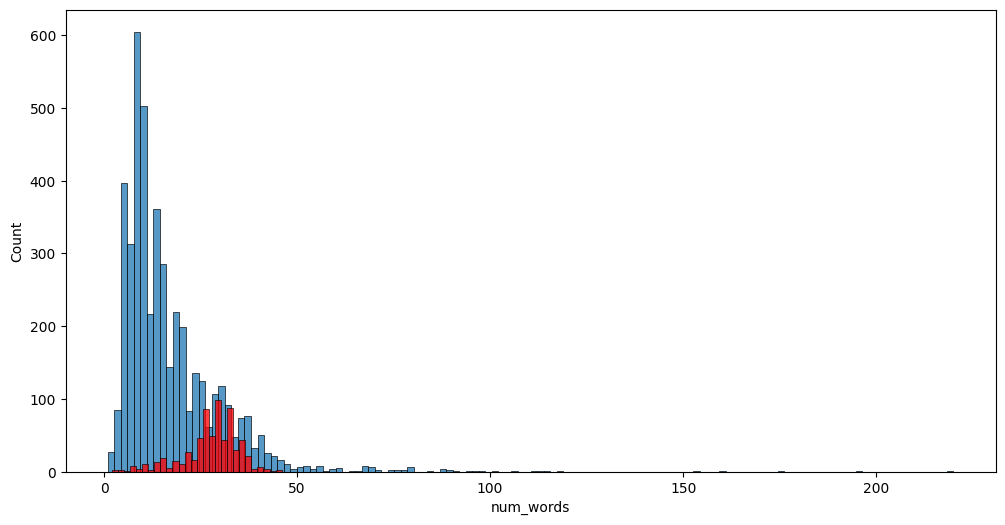

In [800]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Label'] == 0]['num_words'])
sns.histplot(df[df['Label'] == 1]['num_words'],color='red')

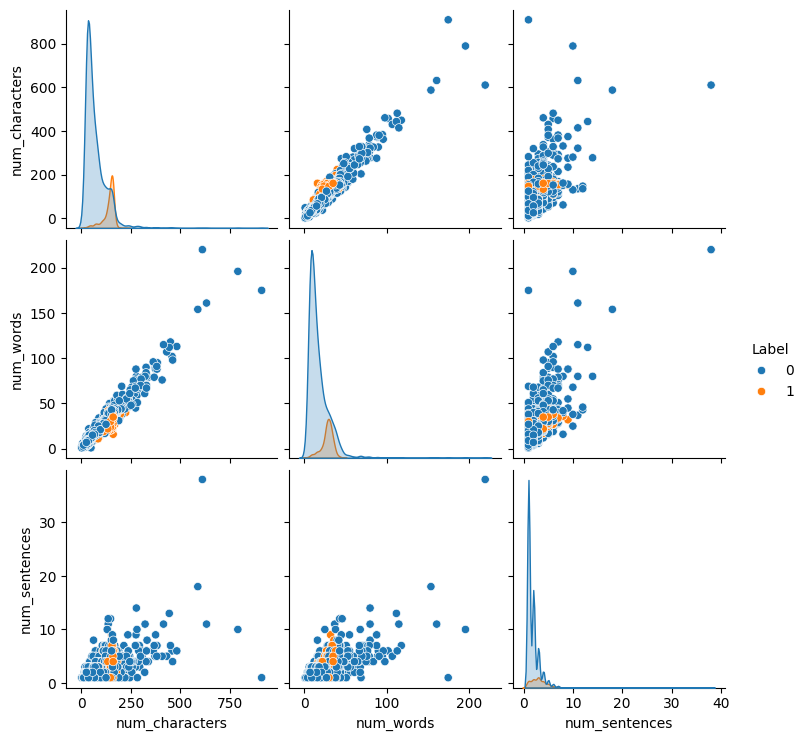

In [801]:
sns.pairplot(df,hue='Label')

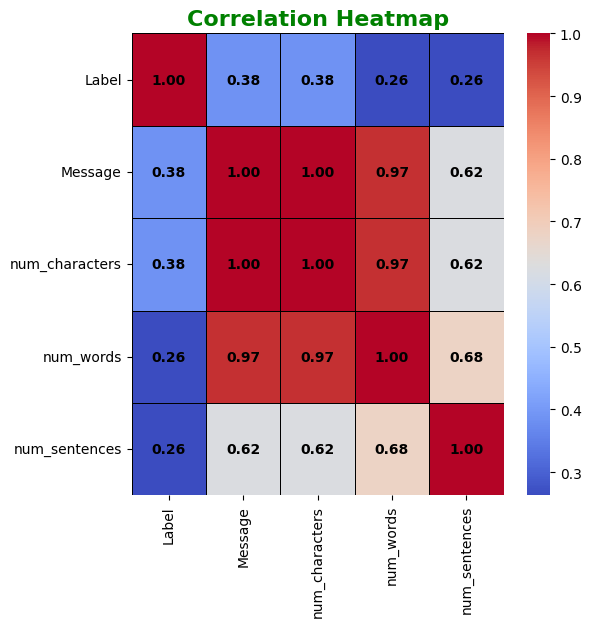

In [802]:
# Function to convert non-numeric columns to numeric values temporarily
def convert_to_numeric(df):
    df_temp = df.copy()
    for col in df_temp.columns:
        if df_temp[col].dtype == 'object':
            df_temp[col] = df_temp[col].apply(lambda x: len(str(x)))
    return df_temp

# Convert non-numeric columns to numeric values
df_numeric = convert_to_numeric(df)

# Set the figure size
plt.figure(figsize=(6, 6))

# Create the heatmap with additional customizations
sns.heatmap(df_numeric.corr(), 
            annot=True, 
            fmt=".2f",
            cmap="coolwarm", 
            linewidths=0.5, 
            linecolor='black', 
            cbar_kws={'shrink': 1.0, 'aspect': 20},
            annot_kws={"size": 10, "weight": "bold", "color": "black"})

# Add a title
plt.title('Correlation Heatmap', color='g', fontsize=16, weight='bold')

# Show the plot
plt.show()

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [803]:
# Download stopwords if you haven't already
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swapn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [804]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [805]:
df.head()

,Label,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [806]:
def transform_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = word_tokenize(text)

        y = []
        for i in text:
            if i.isalnum():
                y.append(i)
        text = y

        text = [ps.stem(word) for word in text]
        return " ".join(text)
    else:
        return ""

In [807]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'i gon na be home soon and i do want to talk about thi stuff anymor tonight k i cri enough today'

In [808]:
df['Message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [809]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [810]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [811]:
df.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [812]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [813]:
spam_wc = wc.generate(df[df['Label'] == 1]['transformed_text'].str.cat(sep=" "))

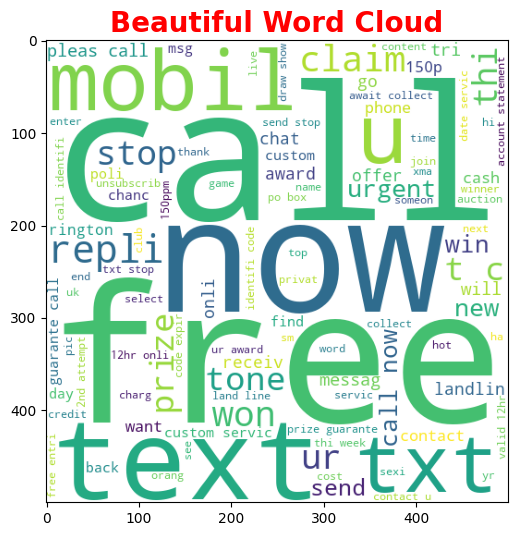

In [814]:
plt.figure(figsize=(10,6))
plt.title('Beautiful Word Cloud', color='r', fontsize=20, weight='bold')  # Add a title
plt.imshow(spam_wc)

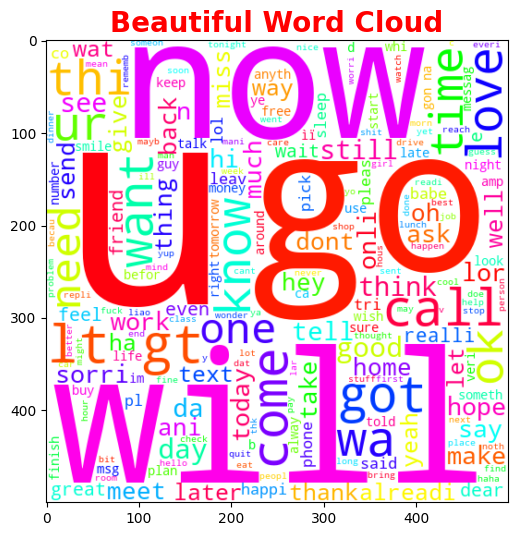

In [815]:
# Custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, 100%, 50%)".format(random_state.randint(0, 360))

# Assuming 'ham_wc' is your word cloud object
plt.figure(figsize=(10, 6))

# Customize the word cloud with a custom color function
ham_wc = WordCloud(
    width=500,
    height=500,
    background_color='white',  # Change background color
    color_func=custom_color_func,  # Apply custom color function
    contour_color='steelblue',    # Add contour color
    contour_width=1               # Set contour width
).generate_from_frequencies(ham_wc.words_)

plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Beautiful Word Cloud', color='r', fontsize=20, weight='bold')  # Add a title
plt.show()

In [816]:
df.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


In [817]:
spam_corpus = []
for msg in df[df['Label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [818]:
len(spam_corpus)

14475

C:\Users\swapn\AppData\Local\Temp\ipykernel_5444\1252627962.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_copy, palette='viridis')


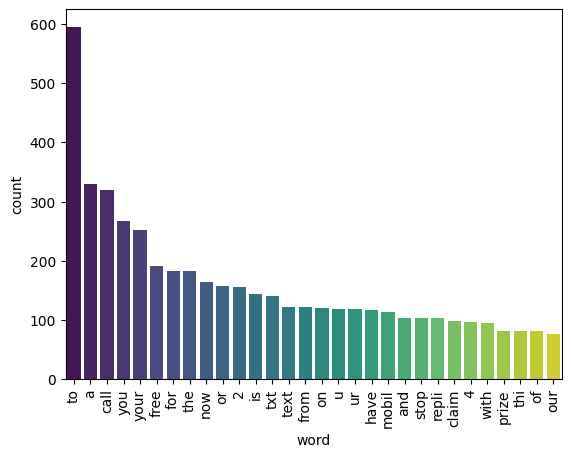

In [827]:
from collections import Counter

# Creating a copy of the DataFrame to ensure the original dataset remains unchanged
df_copy = df.copy()

# Assuming spam_corpus is your list of words
word_counts = Counter(spam_corpus).most_common(30)
df_copy = pd.DataFrame(word_counts, columns=['word', 'count'])


# Creating the bar plot with a colorful palette
sns.barplot(x='word', y='count', data=df_copy, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [829]:
ham_corpus = []
for msg in df[df['Label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [830]:
len(ham_corpus)

62812

C:\Users\swapn\AppData\Local\Temp\ipykernel_5444\2045232585.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=df_copy, palette='viridis')


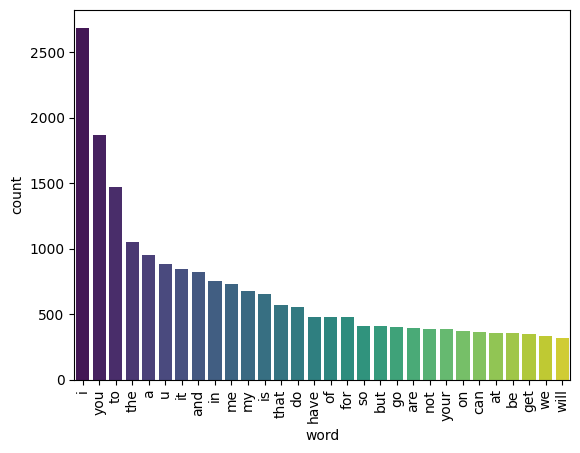

In [832]:
from collections import Counter

# Creating a copy of the DataFrame to ensure the original dataset remains unchanged
df_copy = df.copy()

# Assuming spam_corpus is your list of words
word_counts = Counter(ham_corpus).most_common(30)
df_copy = pd.DataFrame(word_counts, columns=['word', 'count'])


# Creating the bar plot with a colorful palette
sns.barplot(x='word', y='count', data=df_copy, palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [833]:
# Text Vectorization
# using Bag of Words
df.head()

,Label,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazi avail onli in bugi...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri in 2 a wkli comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say so earli hor u c alreadi then say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i do think he goe to usf he live around he...


## 4. Model Building

In [834]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [835]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [836]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [837]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [838]:
X.shape

(5169, 3000)

In [840]:
y = df['Label'].values

In [841]:
from sklearn.model_selection import train_test_split

In [842]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [843]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [844]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [845]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 104]
 [ 23 115]]
0.5251141552511416


In [846]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9680851063829787
[[896   0]
 [ 33 105]]
1.0


In [847]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9806576402321083
[[893   3]
 [ 17 121]]
0.9758064516129032


In [848]:
# tfidf --> MNB

In [851]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [852]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [853]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [854]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [858]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9816247582205029, 0.983739837398374)

In [859]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9816247582205029
Precision -  0.983739837398374
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.84375
For  LR
Accuracy -  0.9622823984526112
Precision -  0.9459459459459459
For  RF
Accuracy -  0.9709864603481625
Precision -  1.0


C:\Users\swapn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9700193423597679
Precision -  0.928
For  BgC
Accuracy -  0.965183752417795
Precision -  0.9180327868852459
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.960348162475822
Precision -  0.9532710280373832
For  xgb
Accuracy -  0.9806576402321083
Precision -  0.9682539682539683


In [860]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [861]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.968085,1.000000
5,RF,0.970986,1.000000
0,SVC,0.981625,0.983740
8,ETC,0.978723,0.983333
10,xgb,0.980658,0.968254
9,GBDT,0.960348,0.953271
4,LR,0.962282,0.945946
6,AdaBoost,0.970019,0.928000
7,BgC,0.965184,0.918033


In [862]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [863]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.907157
1,NB,Accuracy,0.968085
2,RF,Accuracy,0.970986
3,SVC,Accuracy,0.981625
4,ETC,Accuracy,0.978723
5,xgb,Accuracy,0.980658
6,GBDT,Accuracy,0.960348
7,LR,Accuracy,0.962282
8,AdaBoost,Accuracy,0.970019
9,BgC,Accuracy,0.965184


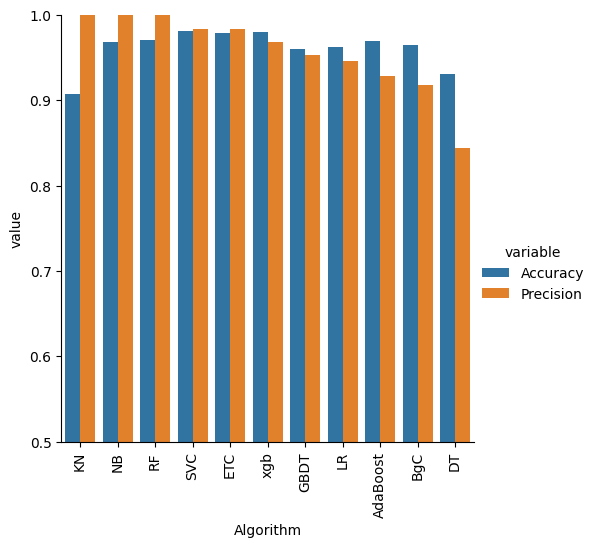

In [865]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [866]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [867]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [868]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [869]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [870]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [871]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [872]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000,0.907157,1.000000
1,NB,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000,0.968085,1.000000
2,RF,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,SVC,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740,0.981625,0.983740
4,ETC,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333,0.978723,0.983333
5,xgb,0.980658,0.968254,0.980658,0.968254,0.980658,0.968254,0.980658,0.968254
6,GBDT,0.960348,0.953271,0.960348,0.953271,0.960348,0.953271,0.960348,0.953271
7,LR,0.962282,0.945946,0.962282,0.945946,0.962282,0.945946,0.962282,0.945946
8,AdaBoost,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000
9,BgC,0.965184,0.918033,0.965184,0.918033,0.965184,0.918033,0.965184,0.918033


In [873]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [874]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [875]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [876]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9825918762088974
Precision 0.9918032786885246


In [877]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [878]:
from sklearn.ensemble import StackingClassifier

In [879]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))